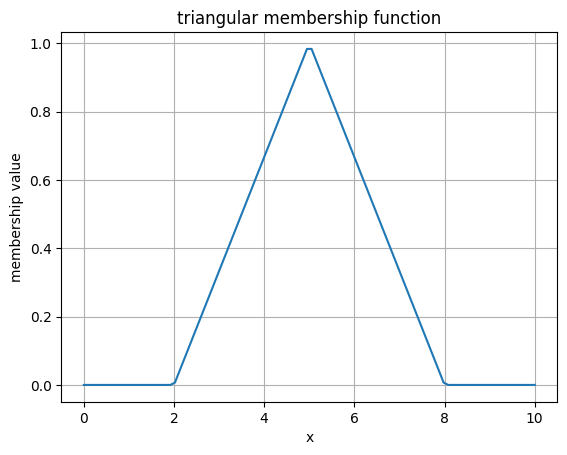

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def triangular_membership(x, a, b, c):
    if x <= a:
        return 0
    elif a < x <= b:
        return (x - a) / (b - a)
    elif b < x <= c:
        return (c - x) / (c - b)
    else:
        return 0
x_values = np.linspace(0, 10, 100)
a,b,c = 2,5,8
membership_values = []
for x in x_values:
    # print("x_values are: ",x)
    plt.title("triangular membership function")
    membership_values1 = triangular_membership(x, a, b, c)
    # print("membership_values are: ",membership_values1)
    membership_values.append(membership_values1)
plt.plot(x_values, membership_values)
plt.xlabel("x")
plt.ylabel("membership value")
plt.grid(True)
plt.show()

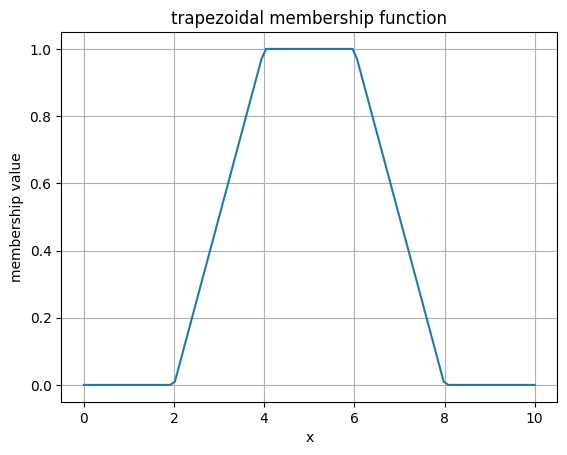

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def trapezoidal_membership(x, a, b, c, d):
  if x<=a:
    return 0
  elif x>a and x<=b:
    return (x-a)/(b-a)
  elif x>b and x<=c:
    return 1
  elif x>c and x<=d:
    return (d-x)/(d-c)
  else:
    return 0

x_values = np.linspace(0, 10, 100)
a,b,c,d = 2,4,6,8
membership_values = []
for x in x_values:
    # print("x_values are: ",x)
    plt.title("trapezoidal membership function")
    membership_values1 = trapezoidal_membership(x, a, b, c, d)
    # print("membership_values are: ",membership_values1)
    membership_values.append(membership_values1)
plt.plot(x_values, membership_values)
plt.xlabel("x")
plt.ylabel("membership value")
plt.grid(True)
plt.show()

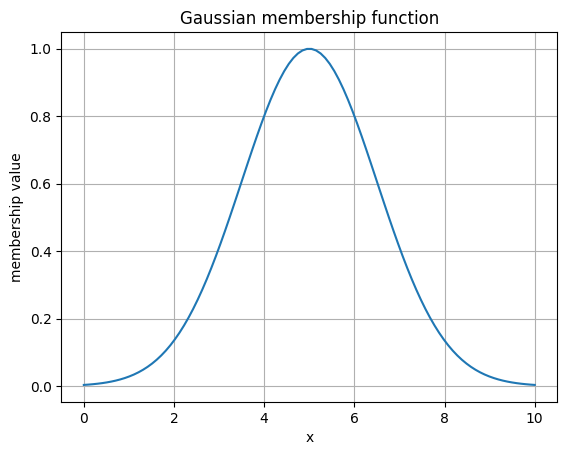

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_membership(x, mean, std_dev):
    return np.exp(-((x - mean)**2) / (2 * (std_dev**2)))

x_values = np.linspace(0, 10, 100)
mean, std_dev = 5, 1.5
membership_values = []

for x in x_values:
    # print("x_values are: ", x)
    plt.title("Gaussian membership function")
    membership_values1 = gaussian_membership(x, mean, std_dev)
    # print("membership_values are: ", membership_values1)
    membership_values.append(membership_values1)

plt.plot(x_values, membership_values)
plt.xlabel("x")
plt.ylabel("membership value")
plt.grid(True)
plt.show()

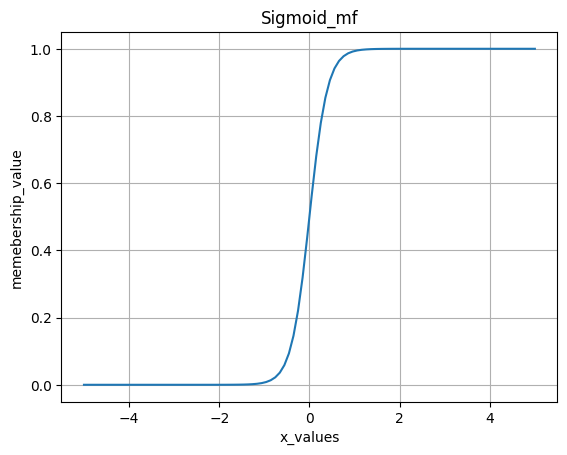

In [ ]:
def sigmoid_mf(x, a, b):
  return 1 / (1 + np.exp(-b * (x - a)))
a,b = 0,5
memebership_value = []
x_values = np.linspace(-5, 5, 100)
for  x in x_values:
  # print(x)
  memebership_value_1 = sigmoid_mf(x,a,b)
  # print(memebership_value_1)
  memebership_value.append(memebership_value_1)
plt.plot(x_values,memebership_value)
plt.xlabel("x_values")
plt.ylabel("memebership_value")
plt.title('Sigmoid_mf')
plt.grid(True)
plt.show()

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 31.4 MB/s eta 0:00:00


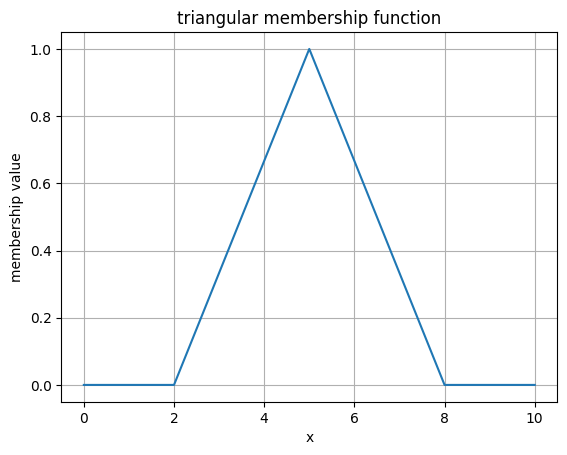

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(0,11,1)
membership_value = fuzz.trimf(x,[2,5,8])

plt.plot(x,membership_value)
plt.title("triangular membership function")
plt.xlabel("x")
plt.ylabel("membership value")
plt.grid(True)
plt.show()

## By using the fis editor with the fuzzy toolbox model tip value that is given after a dinner based on quality answer service

enter service input5
enter food input9
tip generated 16.806387225548903


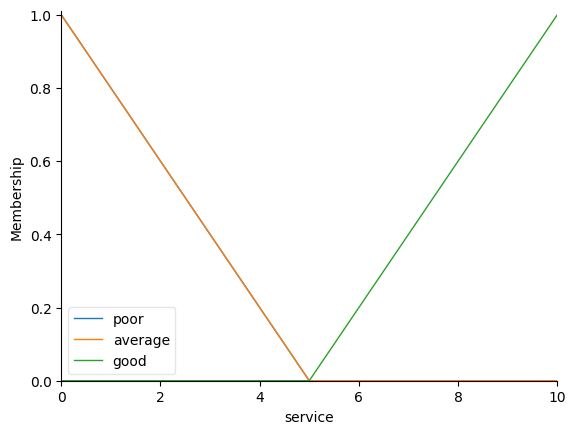

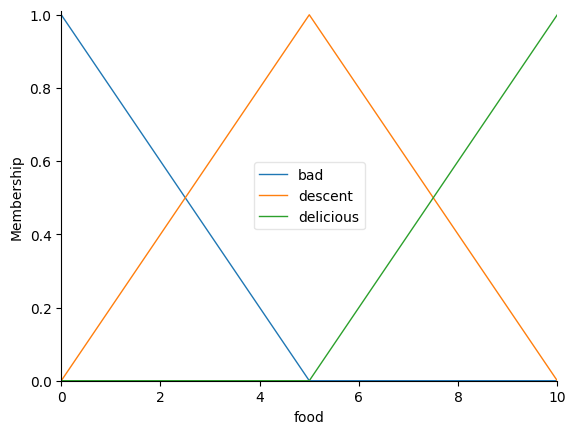

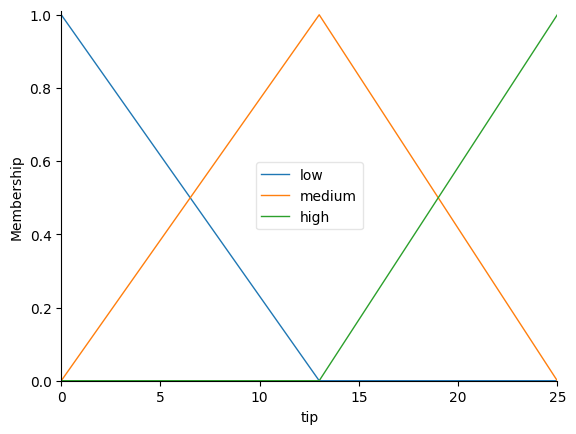

In [ ]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
service=ctrl.Antecedent(np.arange(0,11,1),'service')
food=ctrl.Antecedent(np.arange(0,11,1),'food')
tip=ctrl.Consequent(np.arange(0,26,1),'tip')

service["poor"]=fuzz.trimf(service.universe,[0,0,5])
service["average"]=fuzz.trimf(service.universe,[0,0,5])
service["good"]=fuzz.trimf(service.universe,[5,10,10])

food["bad"]=fuzz.trimf(food.universe,[0,0,5])
food["descent"]=fuzz.trimf(food.universe,[0,5,10])
food["delicious"]=fuzz.trimf(food.universe,[5,10,10])

tip["low"]=fuzz.trimf(tip.universe,[0,0,13])
tip["medium"]=fuzz.trimf(tip.universe,[0,13,25])
tip["high"]=fuzz.trimf(tip.universe,[13,25,25])

rule_1=ctrl.Rule(service["poor"] | food["bad"],tip["low"])
rule_2=ctrl.Rule(service["average"] | food["descent"],tip["medium"])
rule_3=ctrl.Rule(service["good"] | food["delicious"],tip["high"])

tipping_ctrl=ctrl.ControlSystem([rule_1,rule_2,rule_3])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)

service_input=float(input("enter service input"))
food_input=float(input("enter food input"))

tipping.input['service']=service_input
tipping.input['food']=food_input
tipping.compute()

print(f"tip generated",tipping.output['tip'])
service.view()
food.view()
tip.view()
plt.show()

In [ ]:
import numpy as np
def mc_culloch_pitts(x,w):
  w1=1
  w2=-1
  threshold=1
  net_input=w1*x1+w2*x2
  if net_input>=threshold:
    return 1
  else:
    return 0
input = [(0,0),(0,1),(1,0),(1,1)]
result=[]
for x1,x2 in input:
  i=mc_culloch_pitts(x1,x2)
  result.append(i)
print(result)

[0, 0, 1, 0]


In [ ]:
import numpy as np
def mc_culloch_pitts_andnot(x1,x2):
  w1,w2=1,-1
  threshold=1
  net_input=w1*x1+w2*x2
  if net_input>=threshold:
    return 1
  else:
    return 0

def mc_culloch_pitts_or(x1,x2):
  w1,w2=1,1
  threshold=1
  net_input=w1*x1+w2*x2
  if net_input>=threshold:
    return 1
  else:
    return 0

def mc_culloch_pitts_xor(x1,x2):
  term1=mc_culloch_pitts_andnot(x1,x2)
  term2=mc_culloch_pitts_andnot(x2,x1)
  return mc_culloch_pitts_or(term1,term2)

inputs=[(0,0),(0,1),(1,0),(1,1)]
results=[]
for x1,x2 in inputs:
  i=mc_culloch_pitts_xor(x1,x2)
  results.append(i)
print(results)

[0, 1, 1, 0]
